# Exponential smoothing 
Some additional information about [exponential smoothing][1]

[1]: https://www.statsmodels.org/stable/examples/notebooks/generated/exponential_smoothing.html

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
%matplotlib inline

from statsmodels.tsa.api import ExponentialSmoothing

In [2]:
df = pd.read_csv('data/series_g.csv', sep=';')

In [3]:
df.head()

,date,series_g
0,JAN 1949,112
1,FEB 1949,118
2,MAR 1949,132
3,APR 1949,129
4,MAY 1949,121


In [4]:
df.tail()

,date,series_g
139,AUG 1960,606
140,SEP 1960,508
141,OCT 1960,461
142,NOV 1960,390
143,DEC 1960,432


In [6]:
ts_data = df['series_g']
ts_data.head()

0    112
1    118
2    132
3    129
4    121
Name: series_g, dtype: int64

Построим графики объема пассажироперевозок и проверим, какой тип тренда (линейный или нет) и какой тип сезонности (аддитивный или мультипликативный)

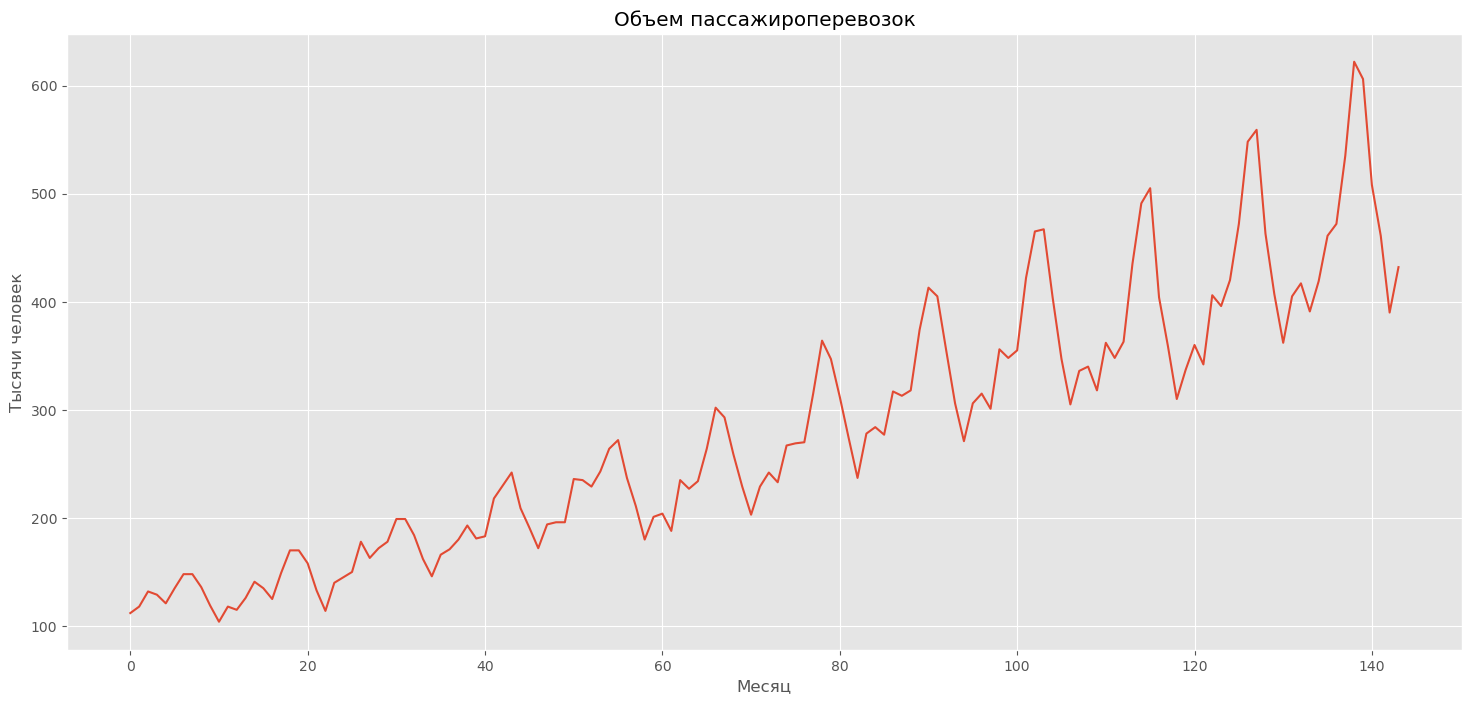

In [7]:
plt.figure(figsize=(18,8))
ts_data.plot()

plt.xlabel(u'Meсяц')
plt.ylabel(u'Тысячи человек')
plt.title(u'Объем пассажироперевозок')

plt.show()

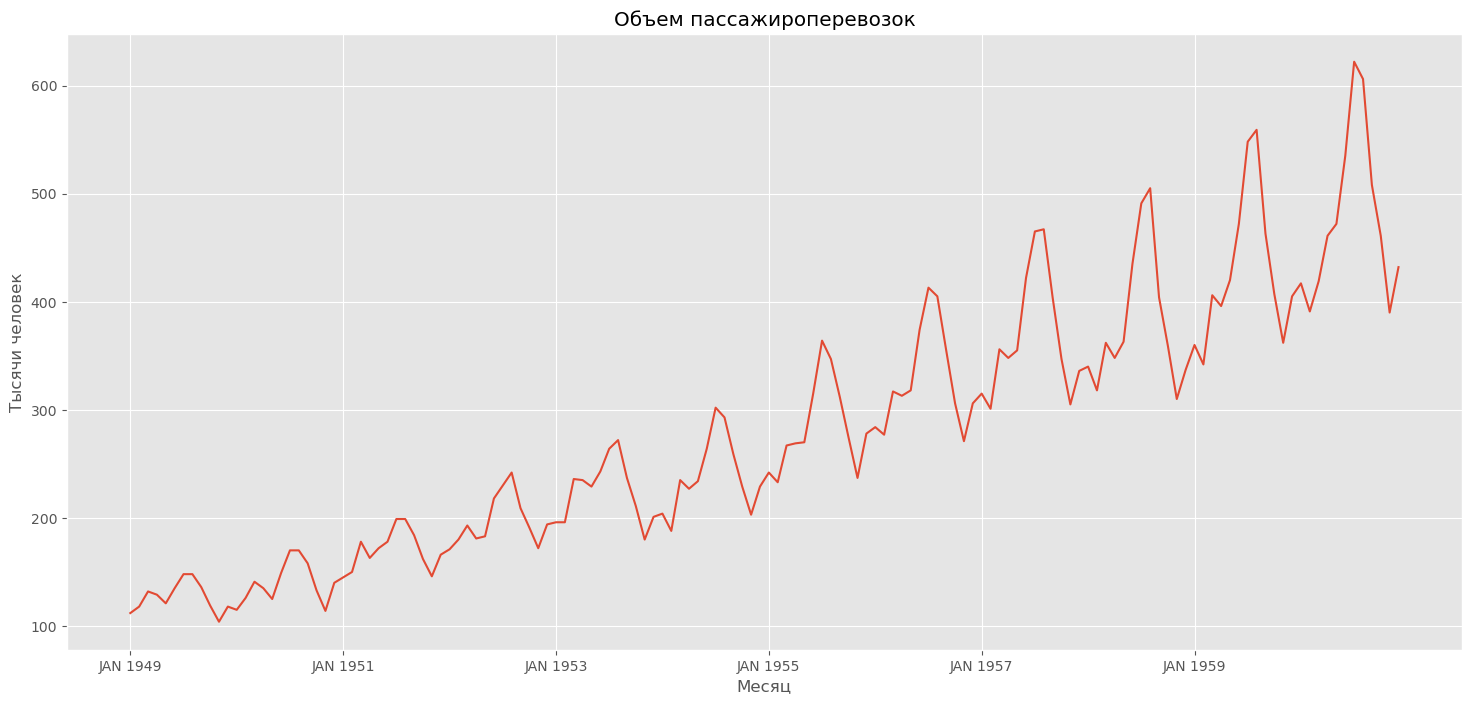

In [8]:
# для подписей к графику
dates = df['date']
y_pos = np.arange(0,144,24)


plt.figure(figsize=(18,8))
ts_data.plot()
plt.xlabel(u'Meсяц')
plt.ylabel(u'Тысячи человек')
plt.title(u'Объем пассажироперевозок')

# Добавляем даты на график
plt.xticks(y_pos, dates[y_pos])
plt.show()

### 5 вопросов 

1. Есть ли у временного ряда тренд? Если есть, то какой (линия, парабола, кубическая функция)
2. Есть ли у временного ряда сезонность? Если есть, то какая (аддитивная или мультипликативная)?
3. Меняет ли ряд свой характер?
4. Есть ли у ряда выбросы?
5. Есть ли у ряда пропуски?

### Ответим на них 
1. Линейный тренд,
2. мультипликативная сезонность,
3. ряд не меняет свой характер,
4. нет выбросов,
5. нет пропусков.

**Замечания** 
- Применяя экспоненциальное сглаживание логарифмировать не надо!
- Процедура справится с любым вариантом, надо только правильно задавать значения параметров. 


# Приступаем к прогнозированию

In [9]:
# ка сколько месяцев желаем прогнозировать?
horizon_ = 12

# Какой тип сезонности?
season_type = 'multiplicative'
# season_type = 'additive'

# Какой период сезонных отклонений?
seas_period_ = 12
# freq = 4
# freq = 7
# freq = 24

In [11]:
# Всегда trend = 'additive' по рекомендации Hyndman'a 
# Всегда damped = True - добавляет к тренду затухание

fit1 = ExponentialSmoothing(ts_data,
                            seasonal_periods=seas_period_,
                            trend='additive',
                            seasonal=season_type,
                            damped_trend=True).fit()

In [12]:
len(ts_data)

144

In [13]:
fitted_ = fit1.predict(0, len(ts_data) + horizon_ - 1)
fitted_

0      112.632283
1      120.120642
2      133.474149
3      128.335254
4      121.015135
          ...    
151    655.269595
152    547.325709
153    488.881047
154    415.759728
155    459.951209
Length: 156, dtype: float64

In [14]:
95.9*2846

272931.4

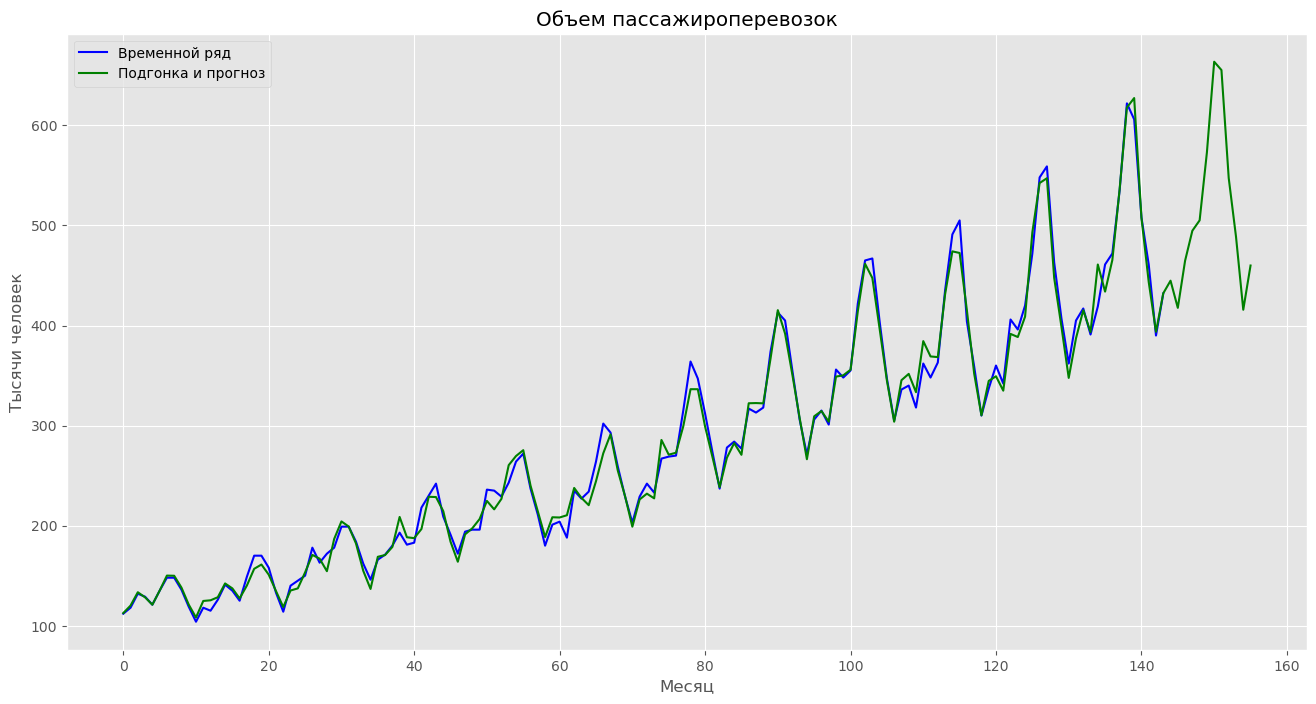

In [15]:
plt.figure(figsize=(16, 8))
plt.plot(ts_data, 'b', label='Временной ряд')
plt.plot(fitted_,'g', label='Подгонка и прогноз')
plt.legend(loc='best')

plt.xlabel(u'Meсяц')
plt.ylabel(u'Тысячи человек')
plt.title(u'Объем пассажироперевозок')

# Добавляем даты на график
plt.show()

Это ответ
Спрогнозированные значения      

In [16]:
fitted_.iloc[len(ts_data):]

144    444.801647
145    417.634999
146    464.720647
147    494.705419
148    505.085723
149    572.972503
150    663.601141
151    655.269595
152    547.325709
153    488.881047
154    415.759728
155    459.951209
dtype: float64